Names: Brian Bruno & Jason Santucci

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Section 1

Our data demonstrates the Unemployment and Median Household Income for the U.S., States, and Counties. This data came from the Unemployment: Bureau of Labor Statistics – LAUS data (https://www.bls.gov/lau/) and from the Median Household Income - Census Bureau - SAIPE data (https://www.census.gov/programs-surveys/saipe/data/datasets.All.html). The data was organized and prepared by USDA, Economic Research Service. Contact: Timothy Parker, Timothy.Parker@usda.gov. Our general research question is to determine which county throughout all the states (10 county sample for each state) seems to have the strongest linear relationship between the median household income and the unemployment rate in the year 2017. We hypothesized that Beauregard Parish, Louisiana, will be the county with the strongest linear relationship. 

## Section 2- Data:

#### Raw Data: 

In [7]:
unemployment_data = pd.read_csv('MG212 - Homework 2 - Unemployment Data by State and County 2007-18 (project).csv')
unemployment_data 

,State,Index_code,Area_name,CLF14,EMP14,UNEMP14,URATE14,CLF15,EMP15,UNEMP15,...,CLF17,EMP17,UNEMP17,URATE17,CLF18,EMP18,UNEMP18,URATE18,MHI17,MHI%ofState17
0,US,NaN,United States,"155,957,297","146,338,305","9,618,992",6.2,"156,866,585","148,579,026","8,287,559",...,"160,273,906","153,293,830","6,980,076",4.4,"161,640,488","155,344,043","6,296,445",3.9,60336.0,NaN
1,AL,0.0,Alabama,"2,160,842","2,014,290","146,552",6.8,"2,158,293","2,026,898","131,395",...,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,48193.0,100.0
2,AL,1.0,"Autauga County, AL","25,592","24,097","1,495",5.8,"25,613","24,283","1,330",...,25972,24958,1014,3.9,"25,957","25,015",942,3.6,58343.0,121.1
3,AL,2.0,"Baldwin County, AL","86,384","81,083","5,301",6.1,"87,741","82,882","4,859",...,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,56607.0,117.5
4,AL,3.0,"Barbour County, AL","8,845","7,913",932,10.5,"8,613","7,848",765,...,8317,7831,486,5.8,"8,373","7,940",433,5.2,32490.0,67.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,WY,7.0,"Fremont County, WY","20,533","19,513","1,020",5.0,"20,265","19,134","1,131",...,19347,18275,1072,5.5,"18,865","17,880",985,5.2,50134.0,81.8
361,WY,8.0,"Goshen County, WY","7,131","6,875",256,3.6,"7,086","6,851",235,...,6922,6723,199,2.9,"6,830","6,604",226,3.3,51023.0,83.3
362,WY,9.0,"Hot Springs County, WY","2,483","2,381",102,4.1,"2,402","2,301",101,...,2332,2241,91,3.9,"2,208","2,126",82,3.7,47775.0,78.0
363,WY,10.0,"Johnson County, WY","4,474","4,273",201,4.5,"4,206","3,999",207,...,4195,4020,175,4.2,"4,211","4,043",168,4.0,55412.0,90.4


#### Variables: 
* **State:** The location in the US
* **Area_name:** Displays the county in the state and the state itself
* **Index_code:** Just a way to organize the data based on states or counties
* **CLF14:** The Civilan Labor Force annual average in 2014
* **EMP14:** The Employment annual average in 2014
* **UNEMP14:** The Unemployment annual average in 2014
* **URATE14:** The Unemployment Rate in 2014
* **CLF15:** The Civilan Labor Force annual average in 2015
* **EMP15:** The Employment annual average in 2015
* **UNEMP15:** The Unemployment annual average in 2015
* **URATE15:** The Unemployment Rate in 2015
* **CLF16:** The Civilan Labor Force annual average in 2016
* **EMP16:** The Employment annual average in 2016
* **UNEMP16:** The Unemployment annual average in 2016
* **URATE16:** The Unemployment Rate in 2016
* **CLF17:** The Civilan Labor Force annual average in 2017
* **EMP17:** The Employment annual average in 2017
* **UNEMP17:** The Unemployment annual average in 2017
* **URATE17:** The Unemployment Rate in 2017
* **CLF18:** The Civilan Labor Force annual average in 2018
* **EMP18:** The Employment annual average in 2018
* **UNEMP18:** The Unemployment annual average in 2018
* **URATE18:** The Unemployment Rate in 2018
* **MHI17:** The Estimate of Median Household Income in 2017
* **MHI%ofState17:** County Household Median Income as a percent of the State Total Median Household Income, 2017

## Section 3 - Data Analysis Plan: 

**Outcome variable (response, Y):** MHI

**Predictor variable (explanatory, X):** Unemployment Rate

**Comparison Groups:** Compare the Unemployment Rate in different counties with the MHI for those counties

**Preliminary exploratory data analysis:** Does it seem that the MHI in each of these counties are somehow related to the unemployment rate in each county? What we would like to do is to be able to do this for all the counties in each state that are listed in our data. We can use this data to see if there truly is a relationship between the unemployment rate and the MHI. For example: Comparing the Unemployment Rate in 2017 in Alabama Counties listed with the MHI in 2017.

Text(0.5, 1.0, 'Unemployment Rate vs. MHI')

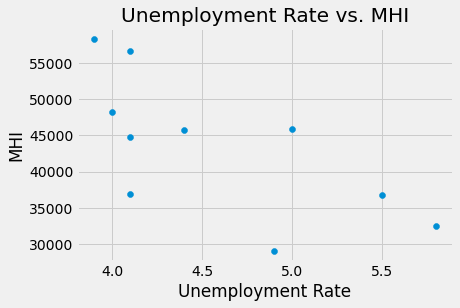

In [4]:
where_states = unemployment_data[unemployment_data['State'] == 'AL']
where_states_sorted = where_states.iloc[1:12]
states_urate_mhi = where_states_sorted.sort_values(by=['MHI17', 'URATE17'])
plt.scatter(states_urate_mhi['URATE17'], states_urate_mhi['MHI17'])
plt.xlabel('Unemployment Rate')
plt.ylabel('MHI')
plt.title('Unemployment Rate vs. MHI')

In [5]:
corr_matrix = np.corrcoef(states_urate_mhi['URATE17'], states_urate_mhi['MHI17'])
corr_matrix.round(2)

array([[ 1.  , -0.68],
       [-0.68,  1.  ]])

After running the scatter plot we can see that the correlation of coefficeint is negative. Not only this but there is a moderate negative relationship between these two, which is the basis of our general research question. We had hoped that there would be a negative relationship between these two. 

Scatter plots and the coefficient of correlation will be extremely helpful in answering our questions about the relationship between Unemployment rate and the MHI. Based on this example as the unemployment rate increases the MHI will decrease. So, based on just this recording our hypothesis is true. 

We could also use bar graphs to show the unemployment rate in all the other counties as well: 

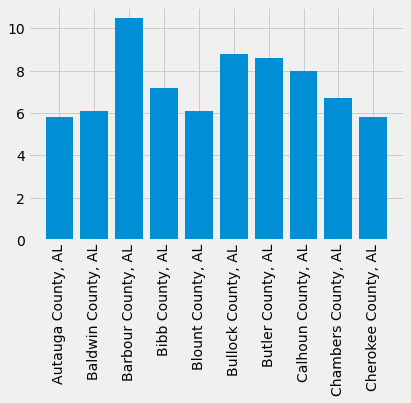

In [6]:
plt.bar(where_states_sorted['Area_name'], where_states_sorted['URATE14'])
plt.xticks(rotation=90)
print()
